In [1]:
import torch
import sys

sys.path.append('..')

import SourceCode

In [2]:
import torch
from SourceCode.EquationClass import MainEquationClass
from SourceCode.utilities import plot_two_1d_functions
from SourceCode.DomainClass import OneDimensionalSimpleDomain
from SourceCode.IntegralEquations import IntegralEquations
from SourceCode.TrainerForNNEquationSolver import TrainerForNNEquationSolver
from SourceCode.ReportMaker import ReportMaker
from math import pi

from scipy.special import gamma
from math import pi
from math import sqrt

n_epochs = 10
n_points = 20

# №1 Fredholm's equation

### $$ y(x) = sin(\pi*x) + \frac{1}{2}\int_{0}^1y(t)dt $$ ###

$$ analytical solution: y(x) = sin(\pi x) + \frac{2}{\pi} $$

In [5]:

left_border = 0
right_border = 1
n_points = 20
integration_func = lambda curr_v, int_domain, nn_model: nn_model(int_domain)
main_eq_res = (lambda curr_v, nn_model: nn_model(curr_v) -
                                            torch.sin(pi * curr_v) - 
               0.5 * IntegralEquations.calculateFredholmEquation1D(
                                                        integration_func,
                                                        nn_model,
                                                        curr_v,
                                                        left_border,
                                                        right_border,
                                                        n_points))
main_domain = OneDimensionalSimpleDomain(0, 1, n_points)

main_eq = MainEquationClass(main_domain, main_eq_res)
n_epochs = 10
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

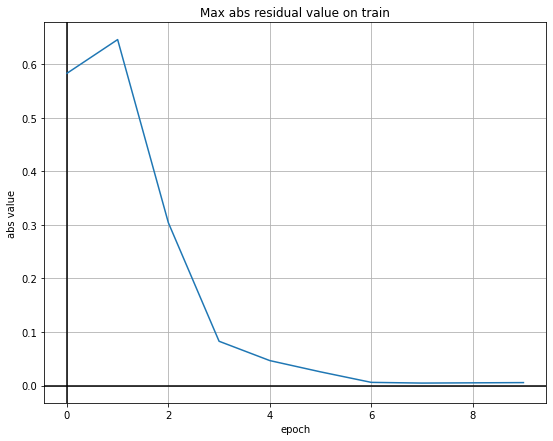

Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 0.004899322986602783
Valid max absolute error |Appr(x)-y(x)|: 0.003607451915740967
MAPE on train data: 0.13027553213760257 %
MAPE on validation data: 0.1197753706946969 %
Max abs value of residual on train at last epoch: 0.0054168701171875 


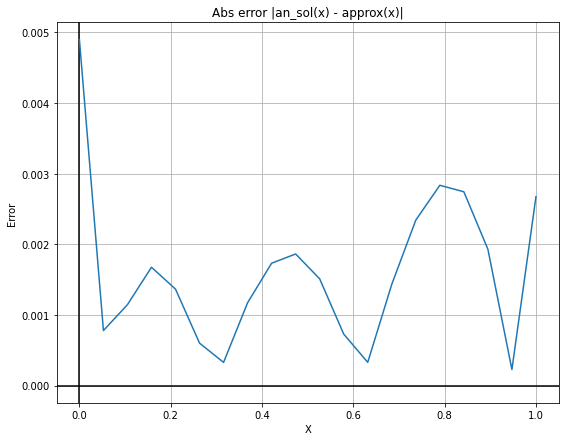

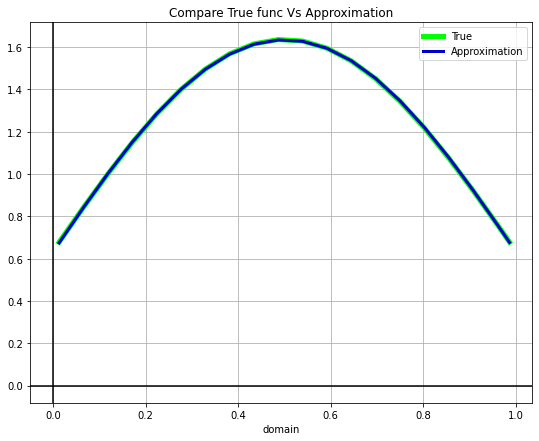

In [7]:
analytical_solution = lambda x_var: torch.sin(pi * x_var) + 2 / pi
report = ReportMaker(nn_model,
                         loss_train,
                         loss_valid,
                         main_domain,
                         compare_to_functions=plot_two_1d_functions,
                         analytical_solutions=analytical_solution
                         )
report.print_loss_history()
report.compare_appr_with_analytical()

# № 2

### $$y(x) = \frac{1}{2}\int_{0}^{\frac{\pi}{2}}xsin(t)y(t)dt + sin(x)$$ ### 
### $$true\_sol = sin(x) + \frac{\pi x}{4}$$ ###

In [8]:

left_border = 0
right_border = pi/2
n_points = 20
integration_func = lambda curr_v, int_domain, nn_model: curr_v * torch.sin(int_domain) * nn_model(int_domain)
main_eq_res = (lambda curr_v, nn_model: nn_model(curr_v) - 
               0.5 * IntegralEquations.calculateFredholmEquation1D(
                                    integration_func,
                                    nn_model,
                                    curr_v,
                                    left_border,
                                    right_border,
                                    n_points) - torch.sin(curr_v))
main_domain = OneDimensionalSimpleDomain(0, 1, n_points)

main_eq = MainEquationClass(main_domain, main_eq_res)
n_epochs = 10
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

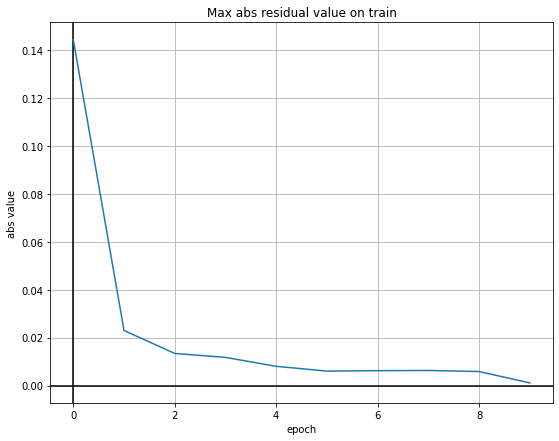

Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 0.0020655393600463867
Valid max absolute error |Appr(x)-y(x)|: 0.0019539594650268555
MAPE on train data: 0.09431353537365794 %
MAPE on validation data: 0.09218102786689997 %
Max abs value of residual on train at last epoch: 0.0010756850242614746 


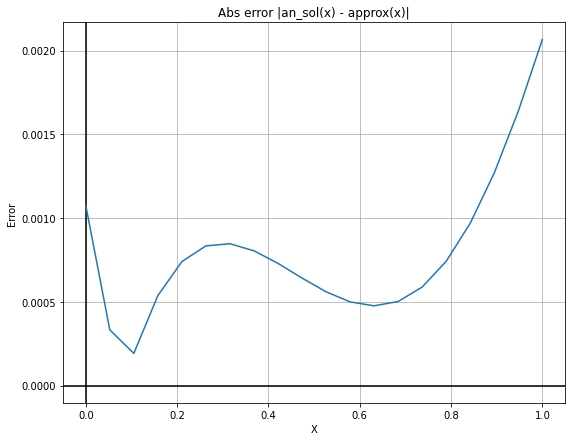

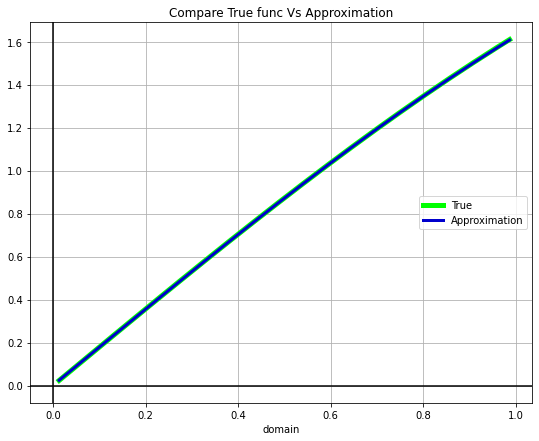

In [9]:
analytical_solution = lambda x_var: torch.sin(x_var) + pi * x_var / 4
report = ReportMaker(nn_model,
                         loss_train,
                         loss_valid,
                         main_domain,
                         compare_to_functions=plot_two_1d_functions,
                         analytical_solutions=analytical_solution
                         )
report.print_loss_history()
report.compare_appr_with_analytical()

#  № 3

### $$ y(x) =  \int_{0}^{1}(\sqrt{xt}y(t)dt + x$$ ###
### $$ true\_sol =  x + \frac{4}{5}\sqrt{x}$$ ###

In [13]:

left_border = 0
right_border = 1
n_points = 20
integration_func = lambda curr_v, int_domain, nn_model: torch.sqrt(curr_v * int_domain) * nn_model(int_domain)
main_eq_res = (lambda curr_v, nn_model: nn_model(curr_v) - 
               IntegralEquations.calculateFredholmEquation1D(
                                            integration_func,
                                            nn_model,
                                            curr_v,
                                            left_border,
                                            right_border,
                                            n_points) - curr_v)
main_domain = OneDimensionalSimpleDomain(0, 1, n_points)

main_eq = MainEquationClass(main_domain, main_eq_res)
n_epochs = 10
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

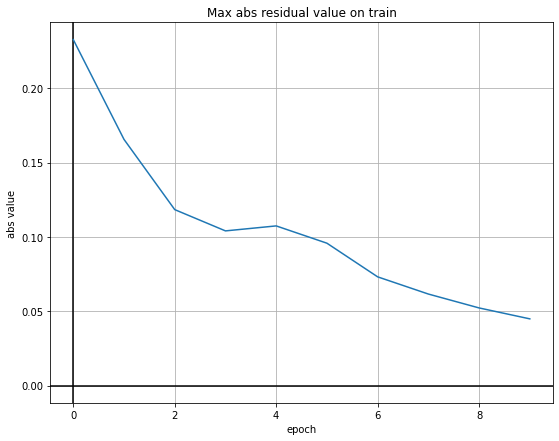

Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 0.04483366012573242
Valid max absolute error |Appr(x)-y(x)|: 0.03503549098968506
MAPE on train data: 1.0542110539972782 %
MAPE on validation data: 0.8663489483296871 %
Max abs value of residual on train at last epoch: 0.04483366012573242 


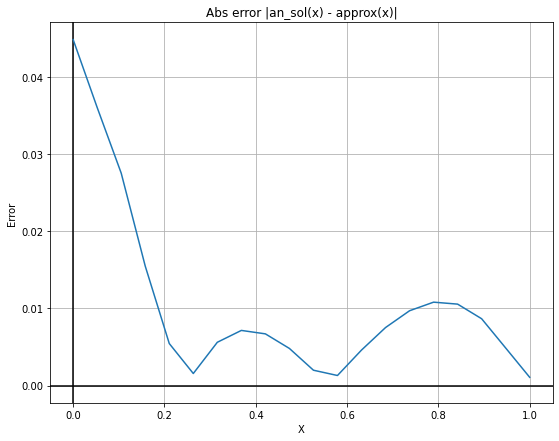

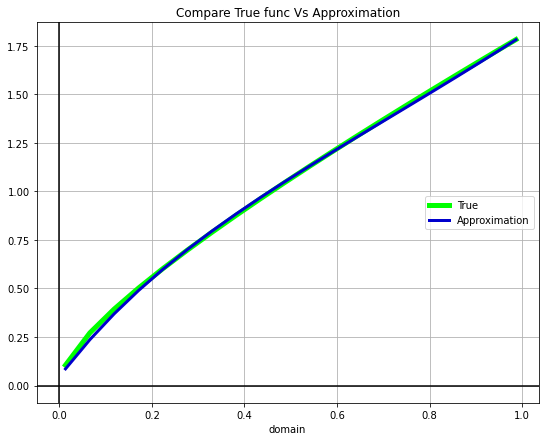

In [14]:
analytical_solution = lambda x_var: x_var + torch.sqrt(x_var) * 0.8
report = ReportMaker(nn_model,
                         loss_train,
                         loss_valid,
                         main_domain,
                         compare_to_functions=plot_two_1d_functions,
                         analytical_solutions=analytical_solution
                         )
report.print_loss_history()
report.compare_appr_with_analytical()

# № 4 Volterra's equation

### $$ y(x) = sin(x) + \int_{0}^{x}sin(x-t)y(t)dt$$ ###
### $$ true\_sol =  x $$ ###

$$x \in [0,1]$$

In [15]:

left_border = 0
right_border = 1
n_points = 20
integration_func = lambda curr_v, int_domain, nn_model: torch.sin(curr_v - int_domain) * nn_model(int_domain)
main_eq_res = (lambda curr_v, nn_model: nn_model(curr_v) - torch.sin(curr_v) - 
               IntegralEquations.calculateVolterraEquation1D(
                                            integration_func,
                                            nn_model,
                                            curr_v,
                                            left_border,
                                            right_border,
                                            n_points))
main_domain = OneDimensionalSimpleDomain(0, 1, n_points)

main_eq = MainEquationClass(main_domain, main_eq_res)
n_epochs = 10
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

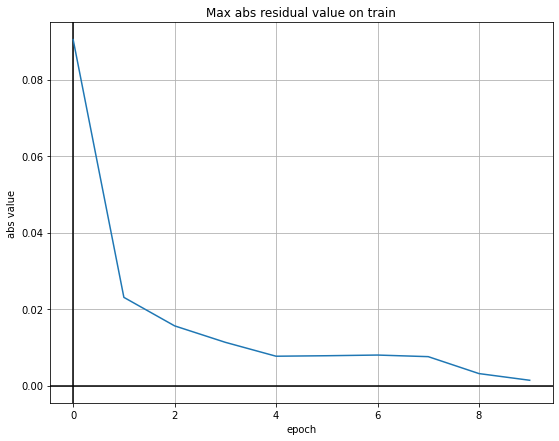

Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 0.001365959644317627
Valid max absolute error |Appr(x)-y(x)|: 0.001236557960510254
MAPE on train data: 0.12022040318697691 %
MAPE on validation data: 0.11879574740305543 %
Max abs value of residual on train at last epoch: 0.0013682544231414795 


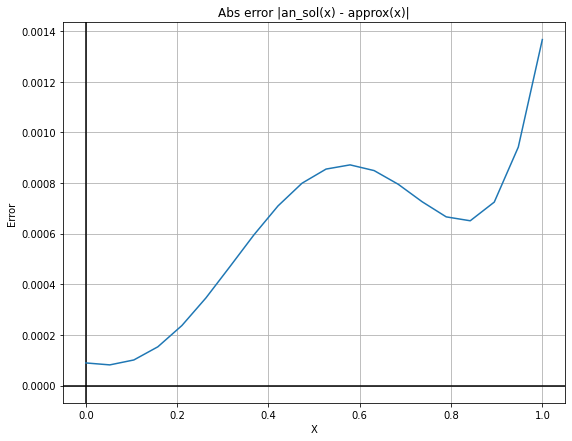

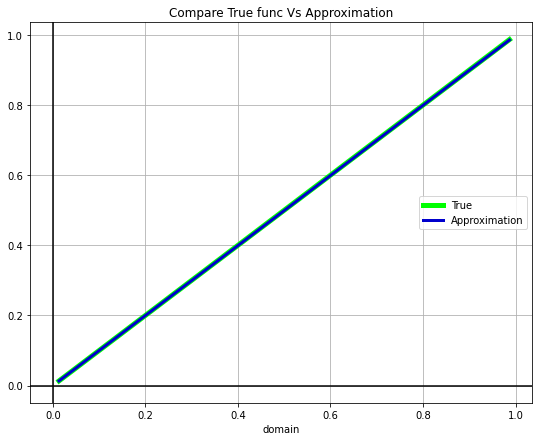

In [16]:
analytical_solution = lambda x_var: x_var
report = ReportMaker(nn_model,
                         loss_train,
                         loss_valid,
                         main_domain,
                         compare_to_functions=plot_two_1d_functions,
                         analytical_solutions=analytical_solution
                         )
report.print_loss_history()
report.compare_appr_with_analytical()

In [17]:
report.print_comparison_table()

train data
       Input  Analytical       ANN     Error
0   0.000000    0.000000 -0.000089  0.000089
1   0.052632    0.052632  0.052550  0.000081
2   0.105263    0.105263  0.105162  0.000101
3   0.157895    0.157895  0.157742  0.000153
4   0.210526    0.210526  0.210290  0.000237
5   0.263158    0.263158  0.262812  0.000346
6   0.315789    0.315789  0.315320  0.000470
7   0.368421    0.368421  0.367826  0.000595
8   0.421053    0.421053  0.420344  0.000709
9   0.473684    0.473684  0.472885  0.000799
10  0.526316    0.526316  0.525461  0.000855
11  0.578947    0.578947  0.578076  0.000871
12  0.631579    0.631579  0.630730  0.000849
13  0.684211    0.684211  0.683416  0.000795
14  0.736842    0.736842  0.736117  0.000726
15  0.789474    0.789474  0.788808  0.000666
16  0.842105    0.842105  0.841455  0.000650
17  0.894737    0.894737  0.894013  0.000724
18  0.947368    0.947368  0.946427  0.000941
19  1.000000    1.000000  0.998634  0.001366
